# assignment 9

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib widget

#mapping stuff
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
station = ['ENWF', 'NC27', 'NC89', 'NCBC']
direct = ['HHE', 'HHN', 'HHZ']

In [3]:
Vs = 4.6 #km/s
Vp = 8 #km/s

### calculation for L
tp = T + L/Vp <br>
ts = T + L/Vs <br>

tp - L/Vp = ts - L/Vs <br>
(ts - tp) = L/Vs - L/Vp <br>

(ts - tp) = (L\*Vp - L\*Vs)/Vs\*Vp <br>

L = Vs\*Vp\*(ts - tp)/(Vp-Vs)

In [4]:
def distance(Vs,Vp,ts,tp):
    L = Vs*Vp*((ts - tp).total_seconds())/(Vp-Vs)
    return L

## First Station NC27
Supposed to be the easiest to decipher<br>

In [5]:
nc27_lat = 47.76258
nc27_lon = -127.758102

In [6]:
dfa= pd.read_csv('NV.'+station[1]+'..'+direct[0]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')
dfb= pd.read_csv('NV.'+station[1]+'..'+direct[1]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')
dfc= pd.read_csv('NV.'+station[1]+'..'+direct[2]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')

df = {'time':pd.to_datetime(dfa['TIMESERIES']), 'HHE':dfa['NV_NC27__HHE_M,'].values, 'HHN':dfb['NV_NC27__HHN_M,'].values,'HHZ':dfc['NV_NC27__HHZ_M,'].values}
nc27 = pd.DataFrame.from_dict(df)
nc27.head()

,time,HHE,HHN,HHZ
0,2021-09-21 06:13:00.000,-37787,-33233,-31872
1,2021-09-21 06:13:00.005,-37732,-33213,-31883
2,2021-09-21 06:13:00.010,-37663,-33183,-31872
3,2021-09-21 06:13:00.015,-37605,-33225,-31906
4,2021-09-21 06:13:00.020,-37560,-33208,-31908


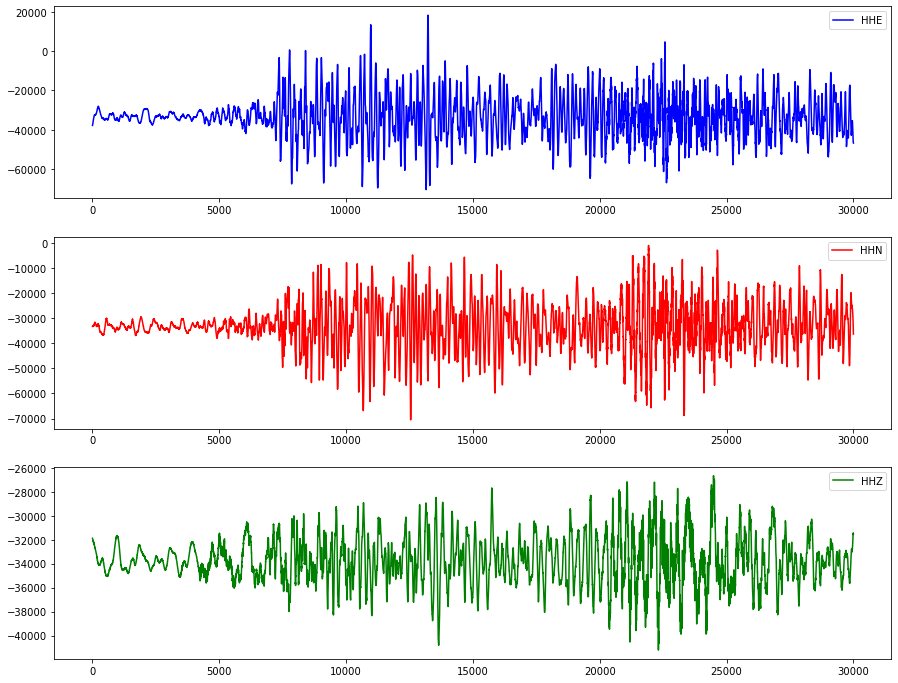

In [7]:
# plot before filtering
fig, ax = plt.subplots(3,1, figsize=(15,12))

ax[0].plot(nc27.HHE, c='b', label='HHE')
ax[0].legend()
ax[1].plot(nc27.HHN, c='r', label='HHN')
ax[1].legend()
ax[2].plot(nc27.HHZ, c='g', label='HHZ')
ax[2].legend()

In [8]:
#filter
def bpfilt(x,dt,lf,hf):
    """
    BPFILT Bandpass filter time series.
    BPFILT(X,DT,LF,HF) takes a time series sampled at DT
    and filters it with a 2nd order, two-pass butterworth
    filter between frequencies LF and HF. If X is a matrix
    BPFILT filters the individual rows of X.
    """
    import numpy as np
    from scipy.signal import butter
    from scipy.signal import filtfilt

    nyq=0.5/dt
    wn=np.array([lf/nyq, hf/nyq])
    [b,a]=butter(2,wn,'bandpass')
    y=filtfilt(b,a,x,axis=0)

    return y

In [9]:
dt = 0.005
lf = 1.0
hf = 15.0

nc27['HHE_filter'] = bpfilt(nc27['HHE'],dt,lf,hf)
nc27['HHN_filter'] = bpfilt(nc27['HHN'],dt,lf,hf)
nc27['HHZ_filter'] = bpfilt(nc27['HHZ'],dt,lf,hf)

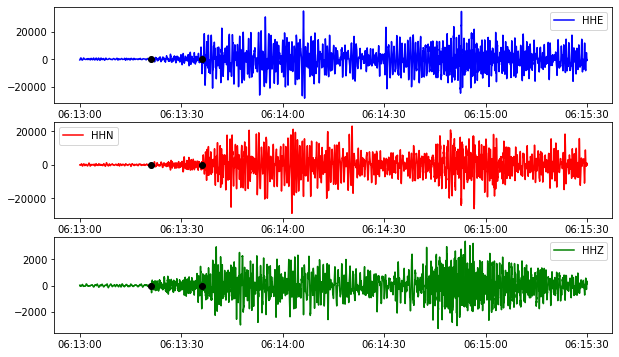

In [10]:
# plot after filtering
fig, ax = plt.subplots(3,1, figsize=(10,6))
timeP = pd.to_datetime('2021-09-21 06:13:21.000') #most obvious from HHZ plot
timeS = pd.to_datetime('2021-09-21 06:13:36.000') #most obvious from HHE plot

ax[0].plot(nc27.time, nc27.HHE_filter, c='b', label='HHE',zorder=0)
ax[0].scatter(timeP, 0,c='k',zorder=1)
ax[0].scatter(timeS, 0,c='k',zorder=1)
ax[0].legend()

ax[1].plot(nc27.time, nc27.HHN_filter, c='r', label='HHN',zorder=0)
ax[1].scatter(timeP, 0,c='k',zorder=1)
ax[1].scatter(timeS, 0,c='k',zorder=1)
ax[1].legend()

ax[2].plot(nc27.time, nc27.HHZ_filter, c='g', label='HHZ',zorder=0)
ax[2].scatter(timeP, 0,c='k',zorder=1)
ax[2].scatter(timeS, 0,c='k',zorder=1)
ax[2].legend()

In [11]:
Lnc27 = distance(Vs,Vp,timeS,timeP)
print(Lnc27)

162.35294117647058


# Station ENWF

In [12]:
enwf_lat = 47.959766
enwf_lon = -129.124479

In [13]:
dfa= pd.read_csv('NV.'+station[0]+'..'+direct[0]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')
dfb= pd.read_csv('NV.'+station[0]+'..'+direct[1]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')
dfc= pd.read_csv('NV.'+station[0]+'..'+direct[2]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')

df = {'time':pd.to_datetime(dfa['TIMESERIES']), 'HHE':dfa['NV_ENWF__HHE_M,'].values, 'HHN':dfb['NV_ENWF__HHN_M,'].values,'HHZ':dfc['NV_ENWF__HHZ_M,'].values}
enwf = pd.DataFrame.from_dict(df)
enwf.head()

,time,HHE,HHN,HHZ
0,2021-09-21 06:13:00.000,-9030,-9794,-9221
1,2021-09-21 06:13:00.005,-9046,-9790,-9216
2,2021-09-21 06:13:00.010,-9057,-9789,-9211
3,2021-09-21 06:13:00.015,-9022,-9807,-9214
4,2021-09-21 06:13:00.020,-9024,-9818,-9222


In [14]:
dt = 0.005
lf = 1.0
hf = 15.0

enwf['HHE_filter'] = bpfilt(enwf['HHE'],dt,lf,hf)
enwf['HHN_filter'] = bpfilt(enwf['HHN'],dt,lf,hf)
enwf['HHZ_filter'] = bpfilt(enwf['HHZ'],dt,lf,hf)

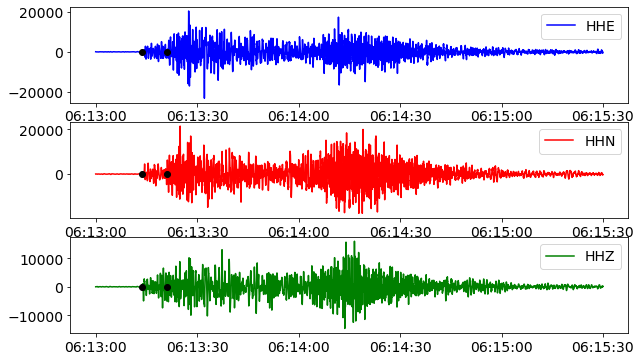

In [29]:
# plot after filtering
fig, ax = plt.subplots(3,1, figsize=(10,6))
timeP = pd.to_datetime('2021-09-21 06:13:13.600') #most obvious from HHZ plot
timeS = pd.to_datetime('2021-09-21 06:13:21.000') #most obvious from HHN plot

ax[0].plot(enwf.time, enwf.HHE_filter, c='b', label='HHE',zorder=0)
ax[0].scatter(timeP, 0,c='k',zorder=1)
ax[0].scatter(timeS, 0,c='k',zorder=1)
ax[0].legend()

ax[1].plot(enwf.time, enwf.HHN_filter, c='r', label='HHN',zorder=0)
ax[1].scatter(timeP, 0,c='k',zorder=1)
ax[1].scatter(timeS, 0,c='k',zorder=1)
ax[1].legend()

ax[2].plot(enwf.time, enwf.HHZ_filter, c='g', label='HHZ',zorder=0)
ax[2].scatter(timeP, 0,c='k',zorder=1)
ax[2].scatter(timeS, 0,c='k',zorder=1)
ax[2].legend()

In [30]:
Lenwf = distance(Vs,Vp,timeS,timeP)
print(Lenwf)

80.09411764705881


# Station NC89

In [17]:
nc89_lat = 48.670537
nc89_lon = -126.848767

In [18]:
dfa= pd.read_csv('NV.'+station[2]+'..'+direct[0]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')
dfb= pd.read_csv('NV.'+station[2]+'..'+direct[1]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')
dfc= pd.read_csv('NV.'+station[2]+'..'+direct[2]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')

df = {'time':pd.to_datetime(dfa['TIMESERIES']), 'HHE':dfa['NV_NC89__HHE_M,'].values, 'HHN':dfb['NV_NC89__HHN_M,'].values,'HHZ':dfc['NV_NC89__HHZ_M,'].values}
nc89 = pd.DataFrame.from_dict(df)
nc89.head()

,time,HHE,HHN,HHZ
0,2021-09-21 06:13:00.000,-9507,-6592,-9693
1,2021-09-21 06:13:00.005,-9527,-6561,-9661
2,2021-09-21 06:13:00.010,-9472,-6568,-9634
3,2021-09-21 06:13:00.015,-9485,-6519,-9617
4,2021-09-21 06:13:00.020,-9553,-6459,-9597


In [19]:
dt = 0.005
lf = 1.0
hf = 15.0

nc89['HHE_filter'] = bpfilt(nc89['HHE'],dt,lf,hf)
nc89['HHN_filter'] = bpfilt(nc89['HHN'],dt,lf,hf)
nc89['HHZ_filter'] = bpfilt(nc89['HHZ'],dt,lf,hf)

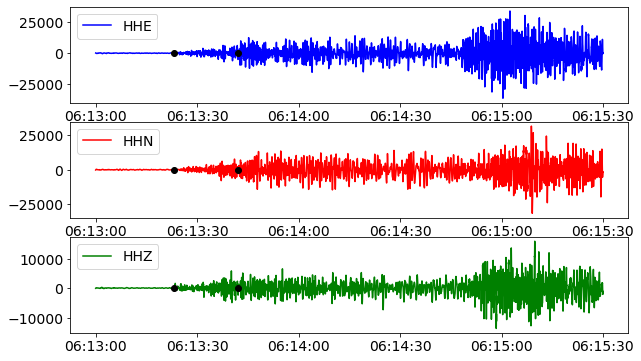

In [32]:
# plot after filtering
fig, ax = plt.subplots(3,1, figsize=(10,6))
timeP = pd.to_datetime('2021-09-21 06:13:23.300') #most obvious from HHZ plot
timeS = pd.to_datetime('2021-09-21 06:13:42.000') #most obvious from HHN plot - less sure about this one as the magnitude
# is less obvious, but to me it looks like the frequency changes

ax[0].plot(nc89.time, nc89.HHE_filter, c='b', label='HHE',zorder=0)
ax[0].scatter(timeP, 0,c='k',zorder=1)
ax[0].scatter(timeS, 0,c='k',zorder=1)
ax[0].legend()

ax[1].plot(nc89.time, nc89.HHN_filter, c='r', label='HHN',zorder=0)
ax[1].scatter(timeP, 0,c='k',zorder=1)
ax[1].scatter(timeS, 0,c='k',zorder=1)
ax[1].legend()

ax[2].plot(nc89.time, nc89.HHZ_filter, c='g', label='HHZ',zorder=0)
ax[2].scatter(timeP, 0,c='k',zorder=1)
ax[2].scatter(timeS, 0,c='k',zorder=1)
ax[2].legend()

In [21]:
Lnc89 = distance(Vs,Vp,timeS,timeP)
print(Lnc89)

202.39999999999998


# Station NCBC

In [22]:
ncbc_lat = 48.4275
ncbc_lon = -126.1752

In [23]:
dfa= pd.read_csv('NV.'+station[3]+'..'+direct[0]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')
dfb= pd.read_csv('NV.'+station[3]+'..'+direct[1]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')
dfc= pd.read_csv('NV.'+station[3]+'..'+direct[2]+'.2021.264.06.13.00.000-2021.264.06.15.30.000.txt', sep = '\s+')

df = {'time':pd.to_datetime(dfa['TIMESERIES']), 'HHE':dfa['NV_NCBC__HHE_M,'].values, 'HHN':dfb['NV_NCBC__HHN_M,'].values,'HHZ':dfc['NV_NCBC__HHZ_M,'].values}
ncbc = pd.DataFrame.from_dict(df)
ncbc.head()

,time,HHE,HHN,HHZ
0,2021-09-21 06:13:00.000,-9894,-12654,-8129
1,2021-09-21 06:13:00.005,-9868,-12675,-8159
2,2021-09-21 06:13:00.010,-9898,-12692,-8162
3,2021-09-21 06:13:00.015,-9878,-12762,-8171
4,2021-09-21 06:13:00.020,-9912,-12772,-8161


In [24]:
dt = 0.005
lf = 1.0
hf = 15.0

ncbc['HHE_filter'] = bpfilt(ncbc['HHE'],dt,lf,hf)
ncbc['HHN_filter'] = bpfilt(ncbc['HHN'],dt,lf,hf)
ncbc['HHZ_filter'] = bpfilt(ncbc['HHZ'],dt,lf,hf)

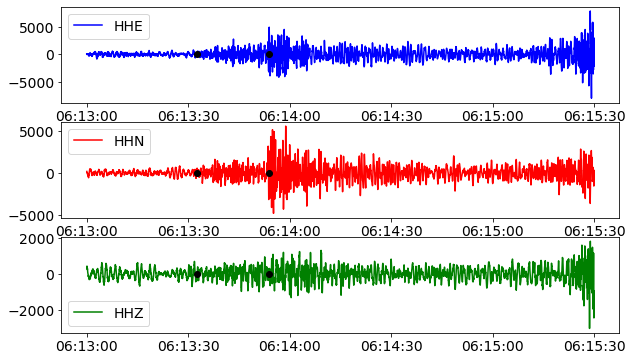

In [33]:
# plot after filtering
fig, ax = plt.subplots(3,1, figsize=(10,6))
timeP = pd.to_datetime('2021-09-21 06:13:32.500') #most obvious from HHE plot (assume what's b4 is noise?)
timeS = pd.to_datetime('2021-09-21 06:13:54.000') #most obvious from HHN plot 
ax[0].plot(ncbc.time, ncbc.HHE_filter, c='b', label='HHE',zorder=0)
ax[0].scatter(timeP, 0,c='k',zorder=1)
ax[0].scatter(timeS, 0,c='k',zorder=1)
ax[0].legend()

ax[1].plot(ncbc.time, ncbc.HHN_filter, c='r', label='HHN',zorder=0)
ax[1].scatter(timeP, 0,c='k',zorder=1)
ax[1].scatter(timeS, 0,c='k',zorder=1)
ax[1].legend()

ax[2].plot(ncbc.time, ncbc.HHZ_filter, c='g', label='HHZ',zorder=0)
ax[2].scatter(timeP, 0,c='k',zorder=1)
ax[2].scatter(timeS, 0,c='k',zorder=1)
ax[2].legend()

In [34]:
Lncbc = distance(Vs,Vp,timeS,timeP)
print(Lncbc)

232.70588235294113


# mapping?

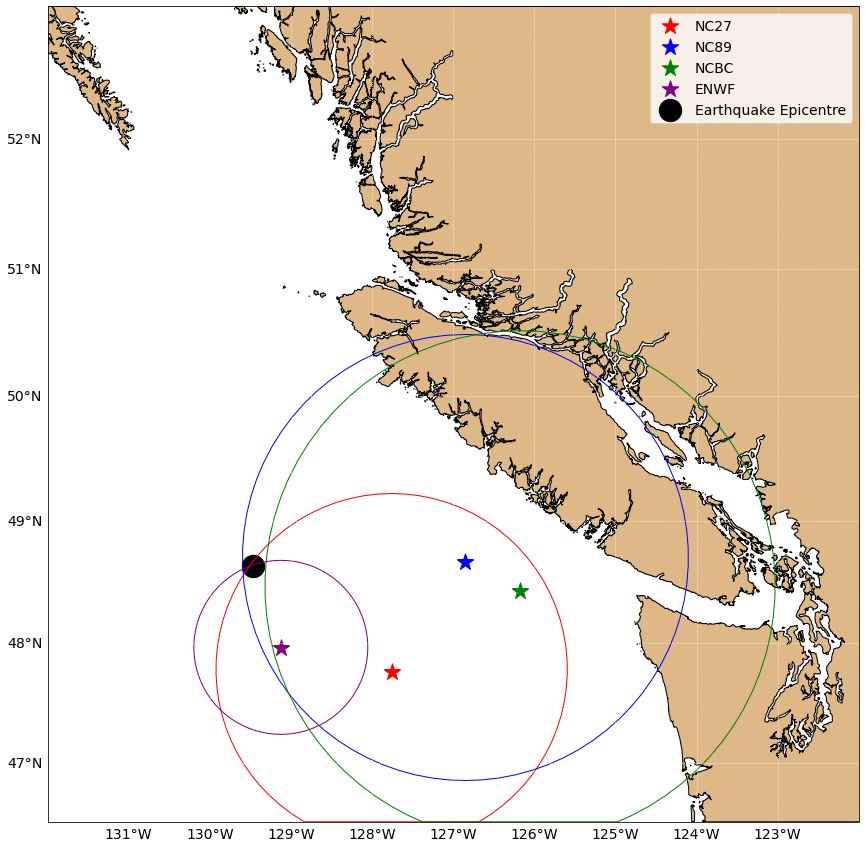

In [41]:
# Increase font size
plt.rcParams['font.size'] = 14

# Make plot area
xlim, ylim = [-132, -122], [46.5, 53]
fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'),zorder=0)

xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='w', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

ax.scatter(nc27_lon, nc27_lat, marker='*',s=300,c='r',transform=crs.PlateCarree(),label="NC27")
ax.scatter(nc89_lon, nc89_lat, marker='*',s=300,c='b',transform=crs.PlateCarree(),label="NC89")
ax.scatter(ncbc_lon, ncbc_lat, marker='*',s=300,c='g',transform=crs.PlateCarree(),label="NCBC")
ax.scatter(enwf_lon, enwf_lat, marker='*',s=300,c='purple',transform=crs.PlateCarree(),label="ENWF")
ax.scatter(-129.47, 48.63, marker='o',s=500,c='k',transform=crs.PlateCarree(),label="Earthquake Epicentre")
ax.legend()
ax.tissot(rad_km=Lnc27, lons=[nc27_lon], lats=[nc27_lat], edgecolors = 'r', facecolors='none')
ax.tissot(rad_km=Lnc89, lons=[nc89_lon], lats=[nc89_lat], edgecolors = 'b', facecolors='none')
ax.tissot(rad_km=Lncbc, lons=[ncbc_lon], lats=[ncbc_lat], edgecolors = 'g', facecolors='none')
ax.tissot(rad_km=Lenwf, lons=[enwf_lon], lats=[enwf_lat], edgecolors = 'purple', facecolors='none')